#                               CUSTOMER SEGMENTATION
                         
                         
                                           USING K-MEANS CLUSTERING

#            importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns

# Loading data


In [2]:
data = pd.read_csv('Mall_Customers.csv')

# Viewing data

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Viewing head and tail

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Finding Length and Shape of data  

In [6]:
len(data)

200

In [7]:
data.shape

(200, 5)

# Viewing Columns names

In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Viewing datatypes

In [9]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# More Information about the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Checking data to conform there are no inconsistencies

In [11]:
data.isnull

<bound method DataFrame.isnull of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# Checking number of missing values for confirmation

In [12]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Conclusion:NO inconcistencies

# Droping Customer Id to decress the dimension 
As there is no impact of it to the data

In [13]:
data = data.drop('CustomerID', axis=1)

In [14]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Renaming Annual Annual Income (k$) and Spending Score (1-100)

In [15]:
data = data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Finding corelations Between each column

# data.corr()

# Spending_Score and Age are bit related

# Now lets look at gender colomn in dataset

Finding unique values in Gender column

In [16]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

There are Male and Female values 

Finding thier counts

In [17]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# plotting Gender  distribution

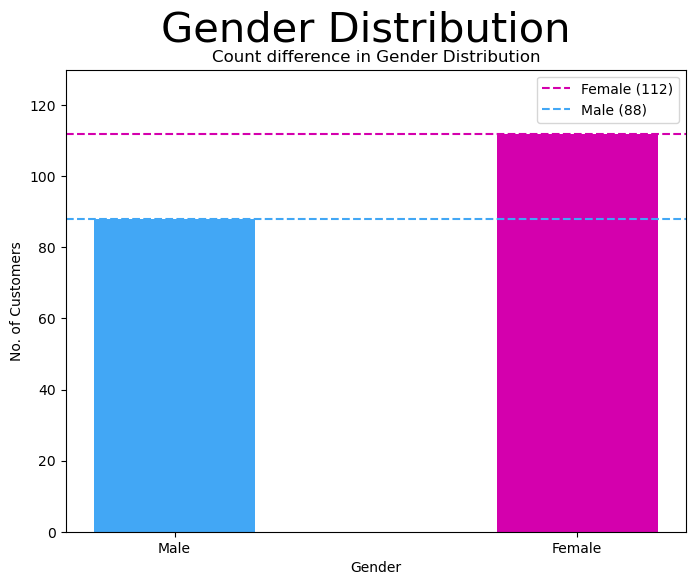

In [18]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0) = plt.subplots(ncols=1,figsize=(8,6))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()
fig.suptitle('Gender Distribution', fontsize=30);

# Age data visualization

In [19]:
data['Age'].head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

# data type of the column

In [23]:
data['Age'].dtype

dtype('int64')

# finding unique values

In [24]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

# statistical description

In [25]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

# VIsualizing statistical description of age distribution

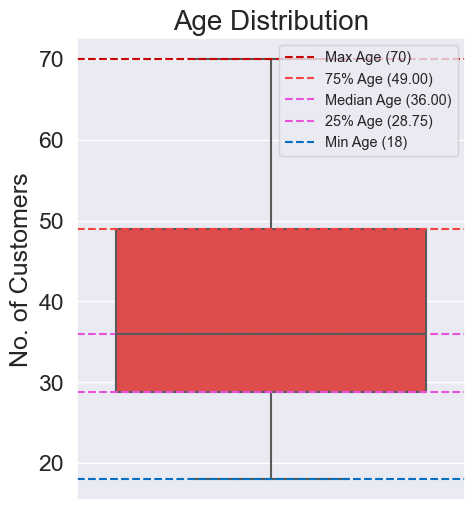

In [27]:
fig, ax = plt.subplots(figsize=(5,6))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

# statistical distribution of male customers

In [28]:
data[data['Gender']=='male']['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

# statistical distribution of female customers

In [31]:
data[data['Gender']=="female"]['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

# Visualizing Gender wise Age Distribution of Male and Female customers on a boxplot.

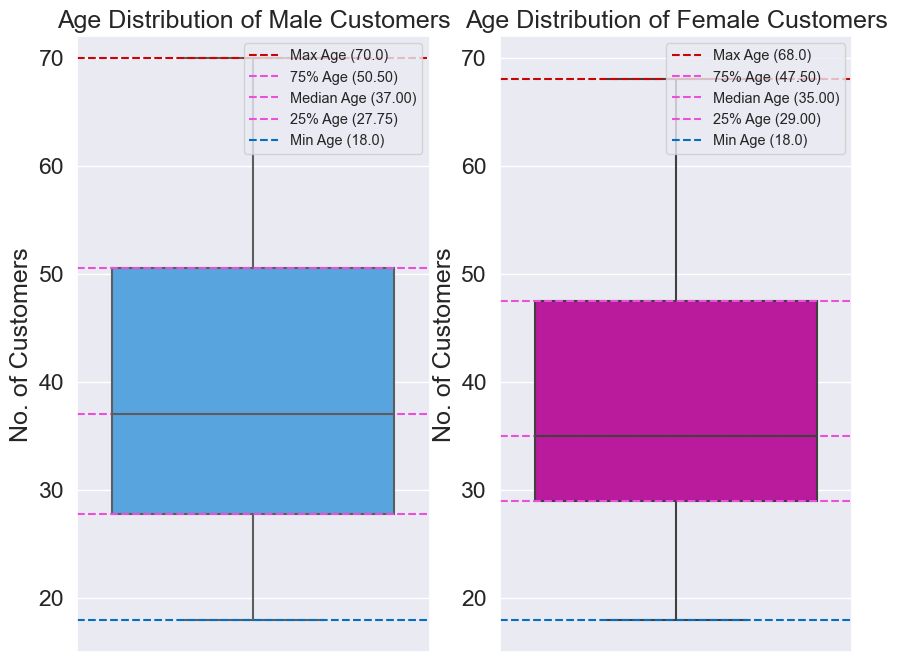

In [34]:
data_male = dedata[data['Gender']=='Male']['Age'].describe()
data_female = data[data['Gender']=='Female']['Age'].describe()

fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(10,8))
sns.set(font_scale=1.5)
sns.boxplot(y=data[data['Gender']=='Male']['Age'], color="#42a7f5", ax=ax0)
ax0.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data_male[7]})')
ax0.axhline(y=data_male[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_male[6]:.2f})')
ax0.axhline(y=data_male[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_male[5]:.2f})')
ax0.axhline(y=data_male[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_male[4]:.2f})')
ax0.axhline(y=data_male[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_male[3]})')
ax0.legend(fontsize='xx-small', loc='upper right')
ax0.set(ylabel='No. of Customers', title='Age Distribution of Male Customers')
ax0.set_ylim(15,72)

ax1 = sns.boxplot(y=data[data['Gender']=='Female']['Age'], color="#d400ad", ax=ax1)
ax1.axhline(y=data_female[7], linestyle='--',color='#c90404', label=f'Max Age ({data_female[7]})')
ax1.axhline(y=data_female[6], linestyle='--',color='#eb50db', label=f'75% Age ({data_female[6]:.2f})')
ax1.axhline(y=data_female[5], linestyle='--',color='#eb50db', label=f'Median Age ({data_female[5]:.2f})')
ax1.axhline(y=data_female[4], linestyle='--',color='#eb50db', label=f'25% Age ({data_female[4]:.2f})')
ax1.axhline(y=data_female[3], linestyle='--',color='#046ebf', label=f'Min Age ({data_female[3]})')
ax1.legend(fontsize='xx-small', loc='upper right')
ax1.set(ylabel='No. of Customers', title='Age Distribution of Female Customers')
ax1.set_ylim(15,72)

plt.show()

# Analyzing annual data Annual_Income

In [35]:
data['Annual_Income'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual_Income, dtype: int64

# checking its datatype

In [36]:
data['Annual_Income'].dtype

dtype('int64')

# statistical data of Annual_Income

In [37]:
data['Annual_Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

# visualizing statistical data of Annual_Income on box plot

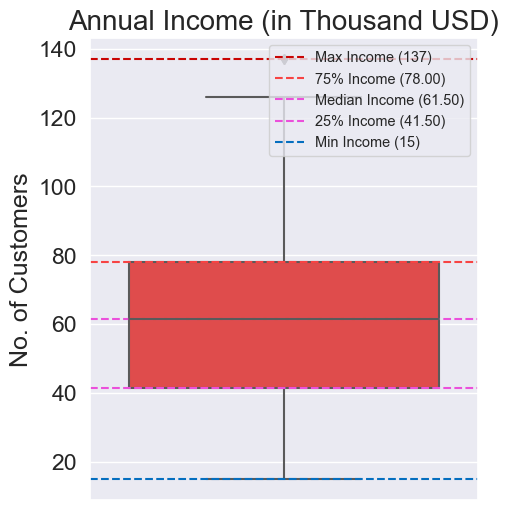

In [39]:
fig, ax = plt.subplots(figsize=(5,6))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Annual_Income"], color="#f73434")
ax.axhline(y=data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({data.Annual_Income.max()})')
ax.axhline(y=data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({data.Annual_Income.median():.2f})')
ax.axhline(y=data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({data.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

# statistical distribution of annual income of male customers

In [40]:
data[data['Gender']=='Male'].Annual_Income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual_Income, dtype: float64

# statistical distribution of annual income of female customers



In [41]:
data[data['Gender']=='Female'].Annual_Income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual_Income, dtype: float64

# Visualizing difference of statisfical distribution of male and female customers

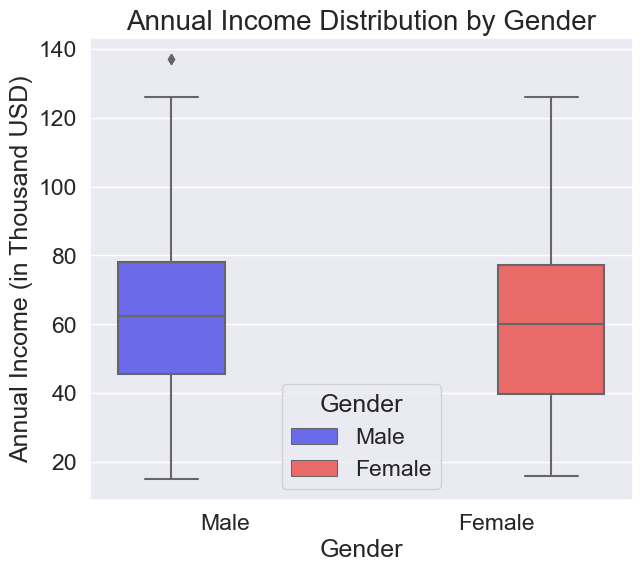

In [44]:
fig, ax = plt.subplots(figsize=(7,6))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

# Visualizing difference of Annual Income between Male and Female Customers using Violin Plot.

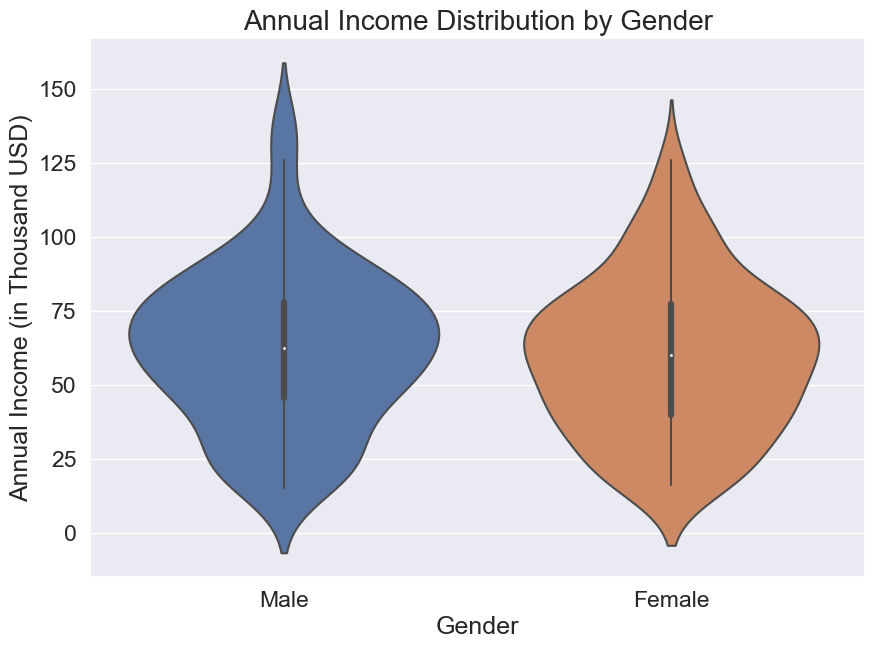

In [46]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Annual_Income'],x=data['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

# Visualizing annual Income per Age by Gender on a scatterplot

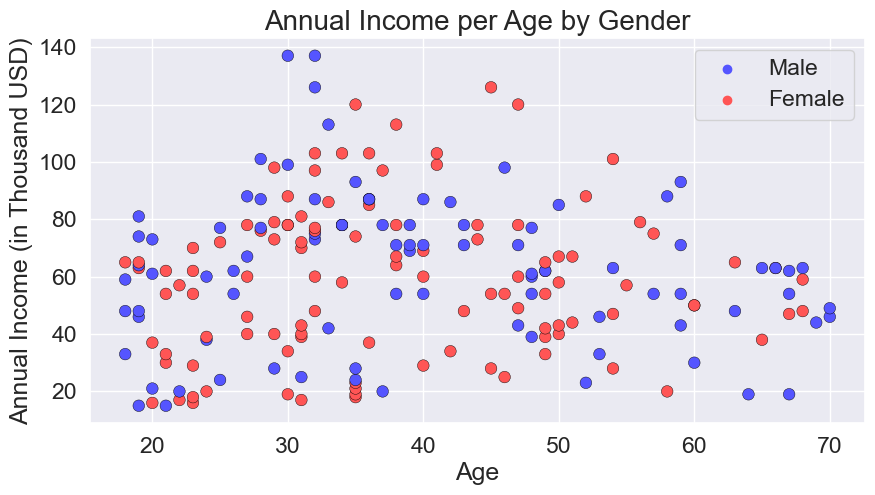

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

# Analyzing spending scores

First lets look the spending score column

In [50]:
data['Spending_Score'].head()

0    39
1    81
2     6
3    77
4    40
Name: Spending_Score, dtype: int64

# Data types of the column

In [51]:
data['Spending_Score'].dtype

dtype('int64')

# Statistical distribution of the spending scores

In [52]:
data['Spending_Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

# Visualizing statistical data about Spending score column on a boxplot.

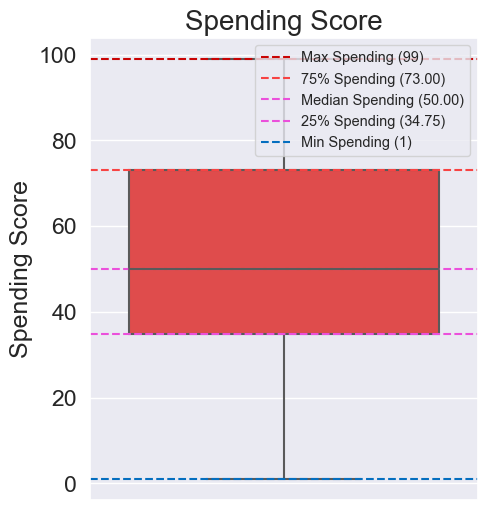

In [54]:
fig, ax = plt.subplots(figsize=(5,6))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')

plt.title('Spending Score', fontsize = 20)
plt.show()

# Statistical distribution of male spending score  

In [64]:
data[data['Gender']=='Male'].Spending_Score.describe()

count    88.000000
mean     48.511364
std      27.896770
min       1.000000
25%      24.500000
50%      50.000000
75%      70.000000
max      97.000000
Name: Spending_Score, dtype: float64

In [65]:
data[data['Gender']=='Female'].Spending_Score.describe()

count    112.000000
mean      51.526786
std       24.114950
min        5.000000
25%       35.000000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending_Score, dtype: float64

# Visualizing statistical difference of Spending_Score between of male and female customers

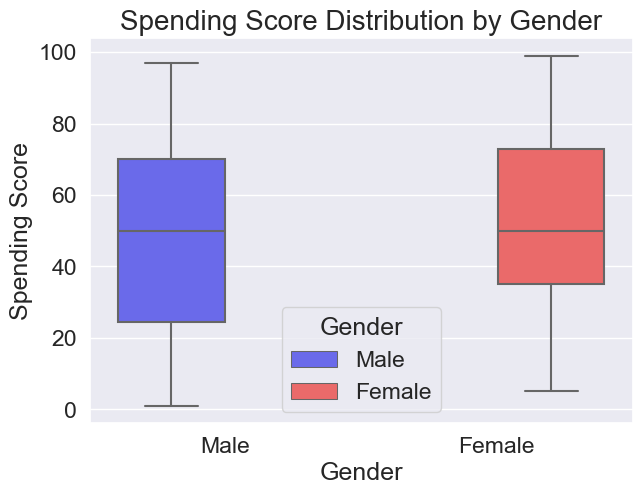

In [68]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending_Score"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

# Visualizing Spending Score per Age by Gender on a scatterplot.

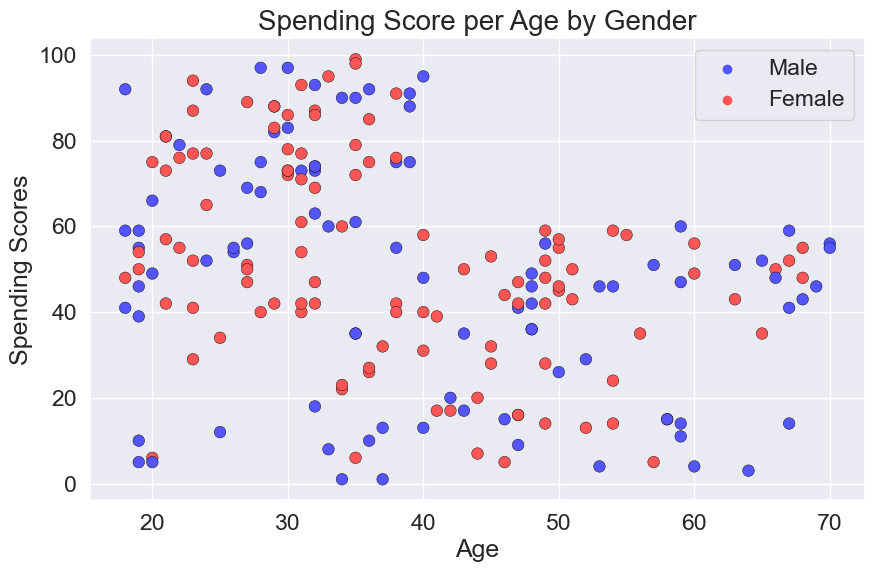

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

# Visualizing the difference of Spending_Scores using voilon plot

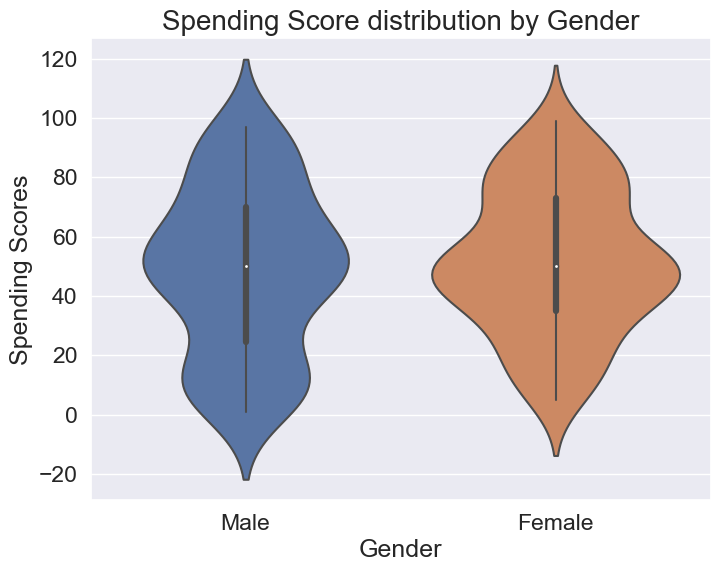

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Spending_Score'],x=data['Gender'])
ax.set_ylabel('Spending Scores')

plt.title('Spending Score distribution by Gender', fontsize = 20)
plt.show()

# K-Means clustering

inspecting the dataset

In [74]:
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [77]:
data.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

# We can conclude there is no missing values

# Data visualizing before clustering 

In [78]:
clustering_data = data.iloc[:,[2,3]]
clustering_data.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


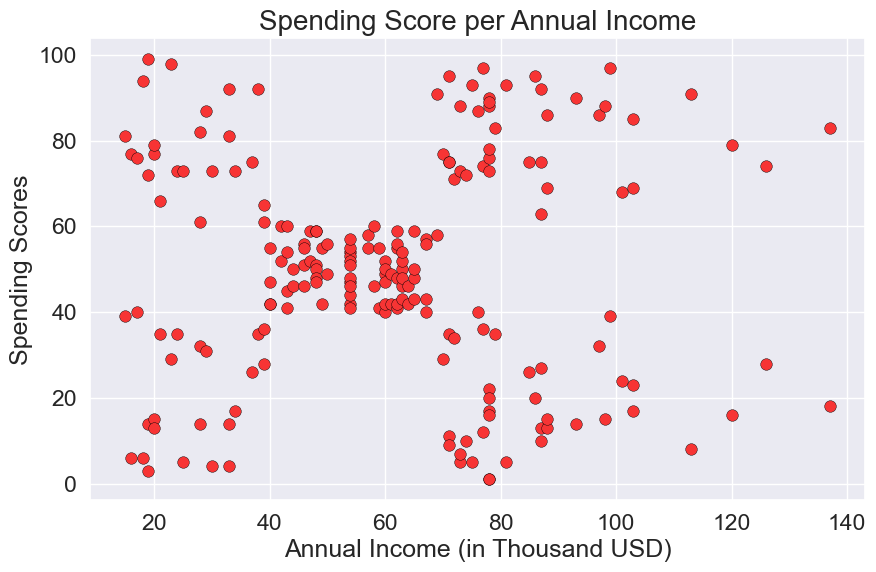

In [80]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_data['Spending_Score'],x=clustering_data['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

# Determining the number of clusters

# Using elbow model
We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value.

# Finding inertia values

In [82]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  30566.45113025,  25061.30411907,
        21818.11458845,  19634.55462935,  17602.19046839,  15989.22560531,
        14339.5264241 ,  13014.83756244,  11696.84890329,  11154.68915251,
        10307.77274882,   9468.91375153,   8882.904551  ,   8013.84988001,
         7792.15890776,   7230.09908449,   6794.32492873,   6383.11194084,
         6091.41584001,   5783.17876984,   5415.37602814,   5335.94090909,
         4865.28790474])

# Now, we visualize the Elbow Method so that we can determine the number of optimal clusters for our dataset.

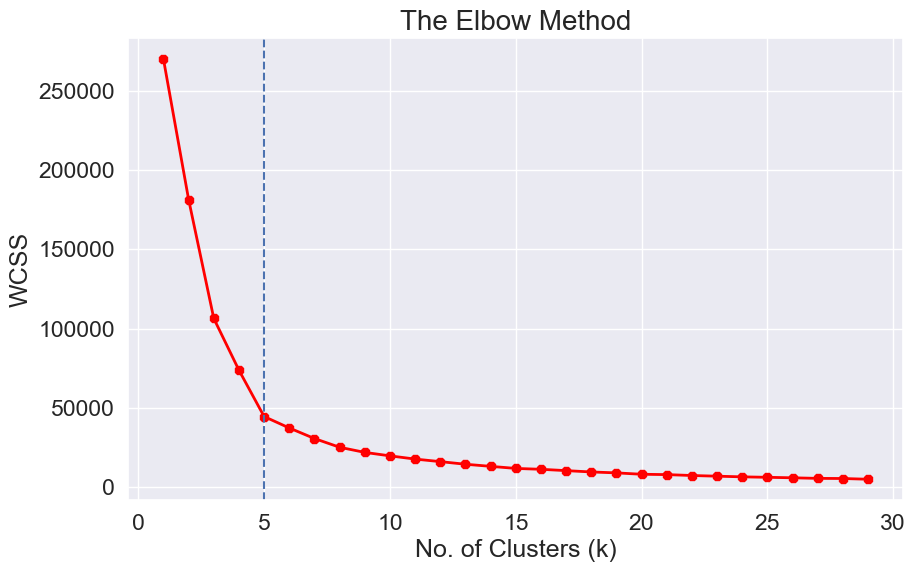

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

# It is clear, that the optimal number of clusters for our data are 5, as the slope of the curve is not steep enough after it
hence k=5

# Clustering

In [87]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

# Centroids of the clusters

In [89]:
kms.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

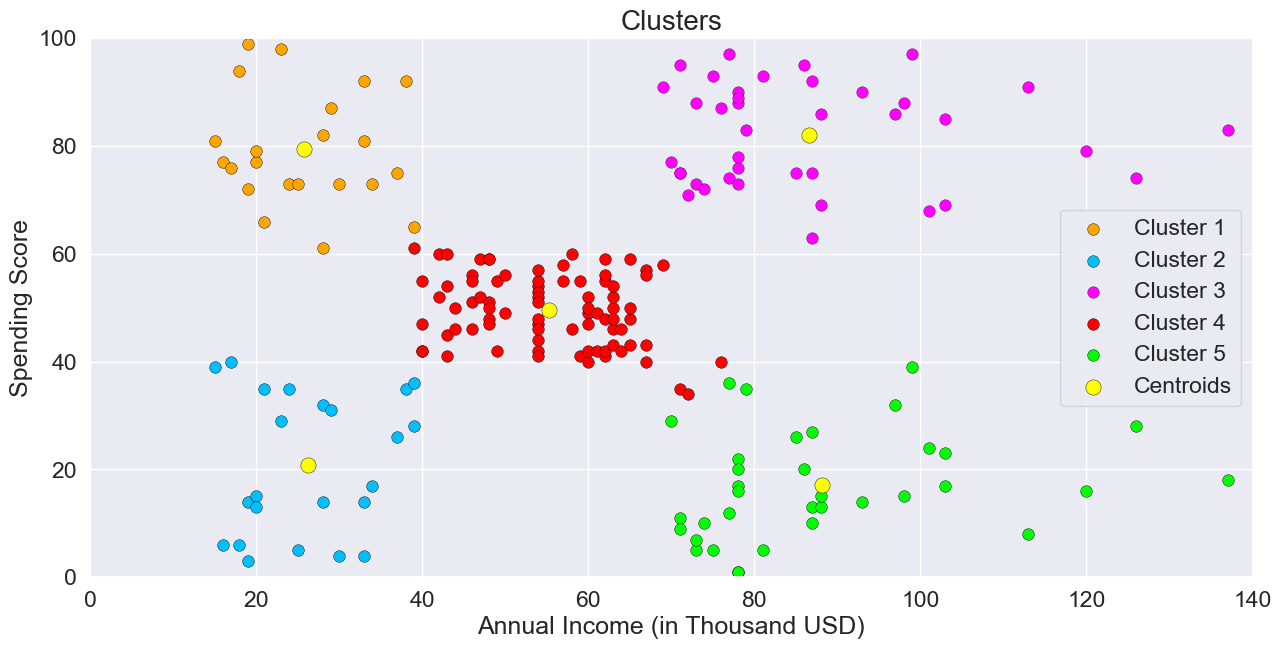

In [95]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

# The generated "Clusters of Customers" plot shows the distribution of the 5 clusters. A sensible interpretation for the mall customer segments can be:

Cluster Orange. Customers with medium annual income and medium annual spend

Cluster Blue. Customers with high annual income and high annual spend

Cluster Purple. Customers with low annual income and low annual spend

Cluster Red. Customers with high annual income but low annual spend

Cluster Green. Customers low annual income but high annual spend


# Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders.